In [1]:
library('kedd')
library('np')

Nonparametric Kernel Methods for Mixed Datatypes (version 0.60-10)
[vignette("np_faq",package="np") provides answers to frequently asked questions]
[vignette("np",package="np") an overview]
[vignette("entropy_np",package="np") an overview of entropy-based methods]



In [2]:
options(repr.plot.width = 10, repr.plot.height = 6)

In [3]:
?density

## Ядерные оценки плотности

Полная документация с примерами https://cran.r-project.org/web/packages/kedd/vignettes/kedd.pdf

Ядра. Параметр `deriv.order` --- порядок производной, по умолчанию 0.

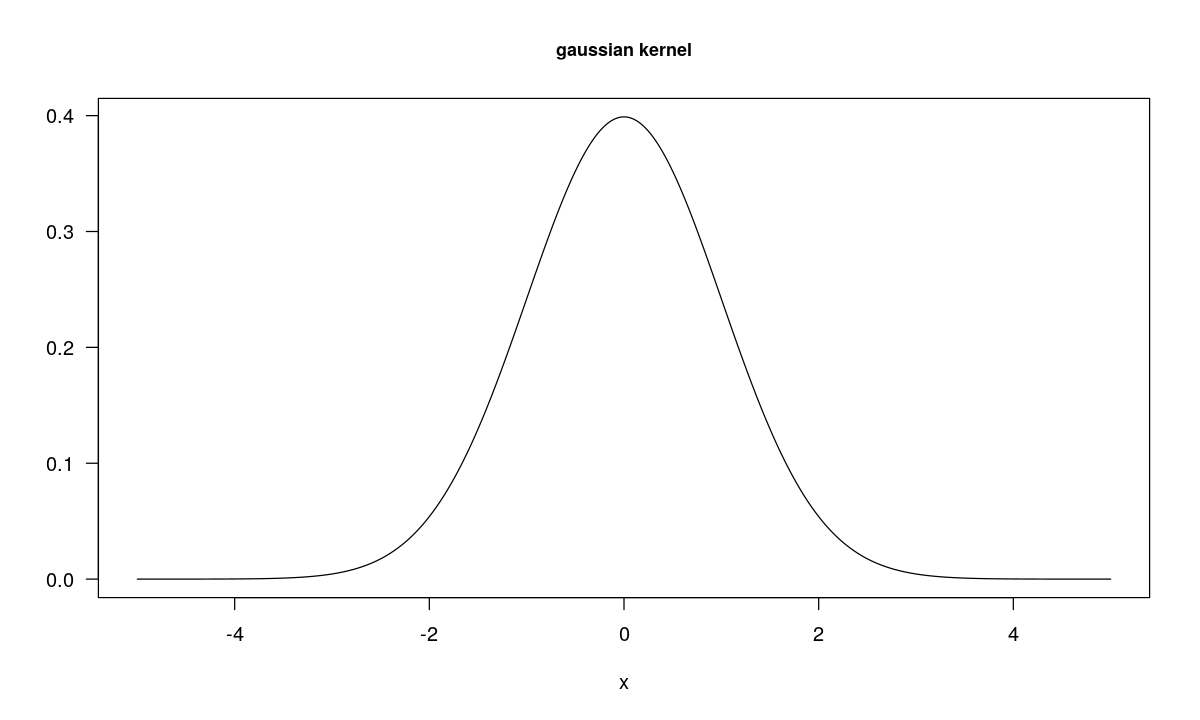

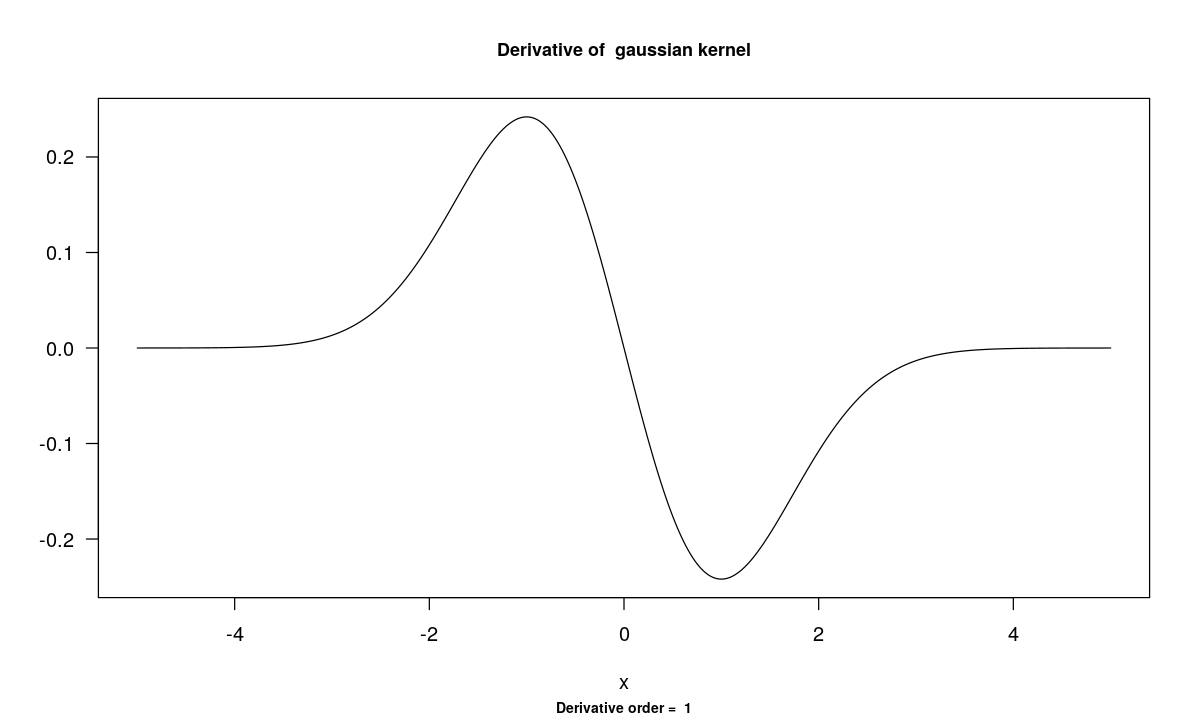

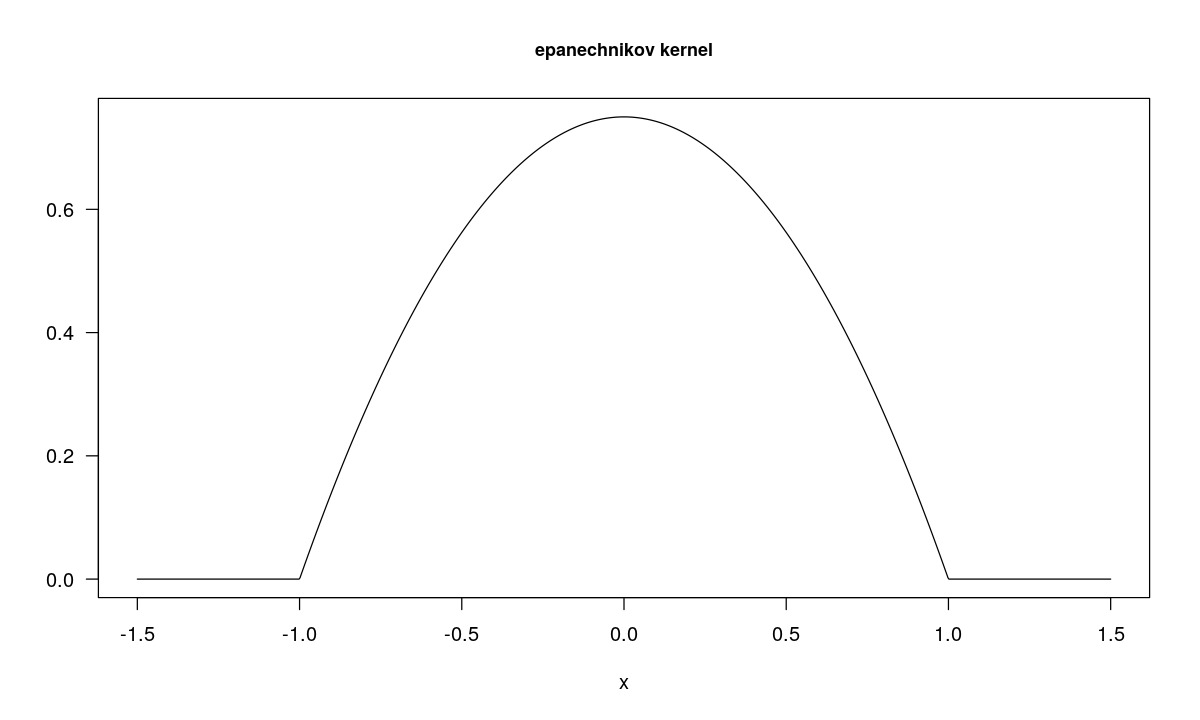

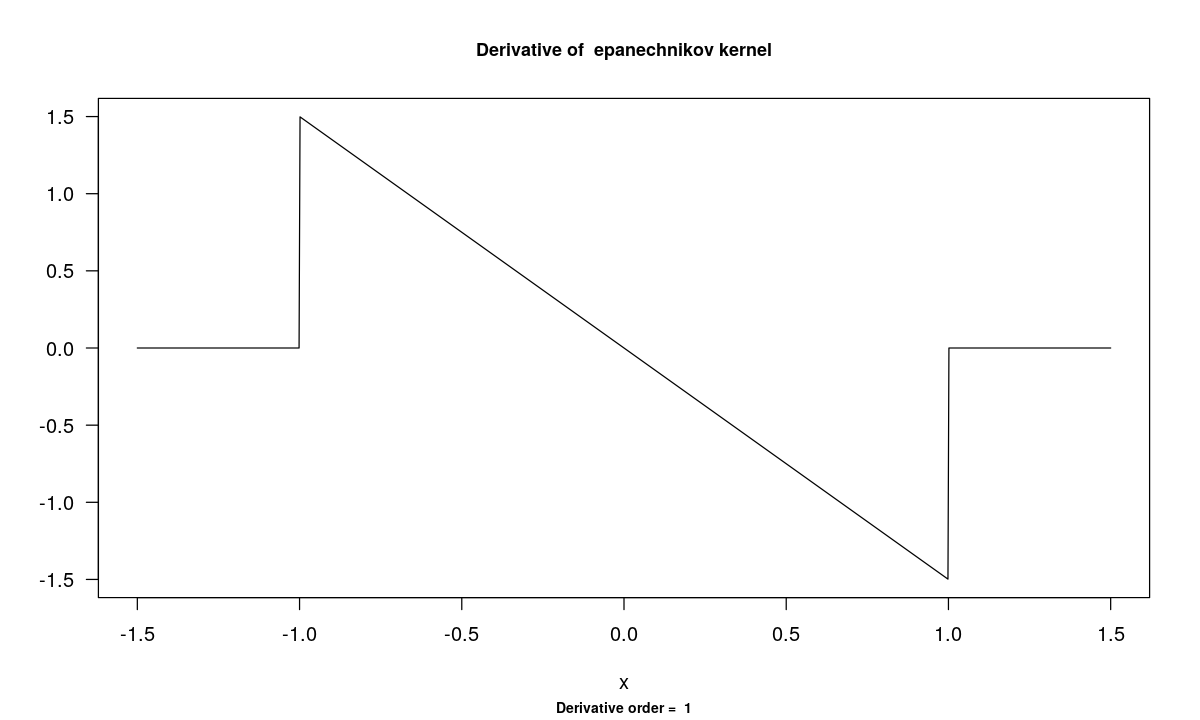

In [4]:
plot(kernel.fun(kernel = "gaussian"))
plot(kernel.fun(kernel = "gaussian", deriv.order = 1))
plot(kernel.fun(kernel = "epanechnikov"))
plot(kernel.fun(kernel = "epanechnikov", deriv.order = 1))

Сгенерируем выборку

In [5]:
sample <- runif(n = 100)

Оценка плотности при помощи гауссовского ядра


Data: sample (100 obs.);	Kernel: gaussian

Derivative order: 0;	Bandwidth 'h' = 0.07644

  eval.points           est.fx       
 Min.   :-0.30254   Min.   :0.00006  
 1st Qu.: 0.09673   1st Qu.:0.13380  
 Median : 0.49600   Median :0.77389  
 Mean   : 0.49600   Mean   :0.62492  
 3rd Qu.: 0.89527   3rd Qu.:0.97468  
 Max.   : 1.29454   Max.   :1.12197  

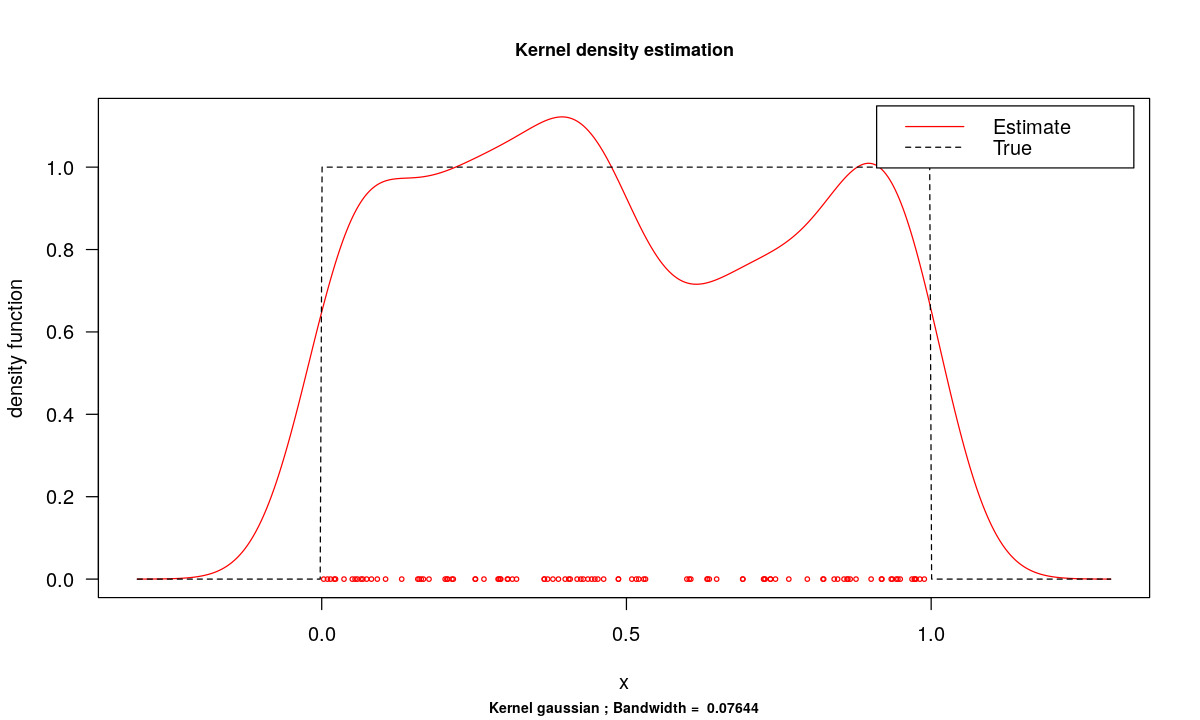

In [6]:
dens.est <- dkde(sample, deriv.order = 0)
dens.est
plot(dens.est, dunif)
points(sample, rep(0, 100), cex = 0.5, col = 'red')

Оценка плотности при помощи равномерного ядра


Data: sample (100 obs.);	Kernel: uniform

Derivative order: 0;	Bandwidth 'h' = 0.1324

  eval.points           est.fx      
 Min.   :-0.52648   Min.   :0.0000  
 1st Qu.:-0.01524   1st Qu.:0.0000  
 Median : 0.49600   Median :0.5663  
 Mean   : 0.49600   Mean   :0.4878  
 3rd Qu.: 1.00724   3rd Qu.:0.9061  
 Max.   : 1.51848   Max.   :1.2082  

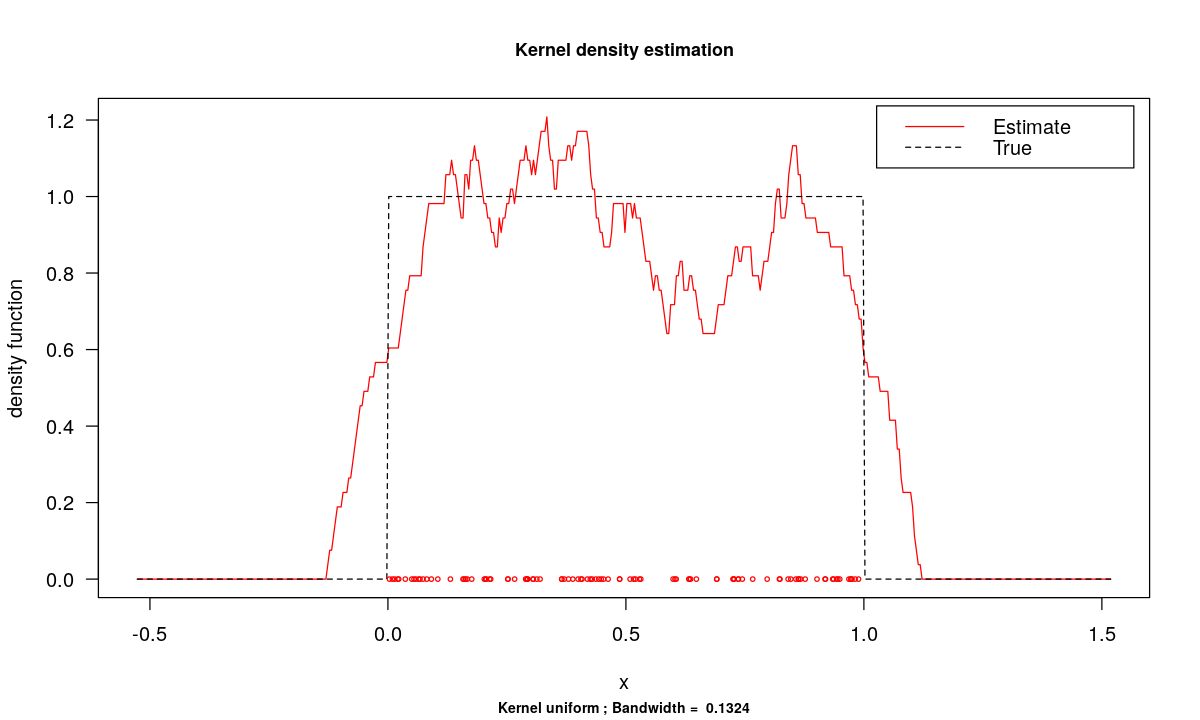

In [7]:
dens.est <- dkde(sample, deriv.order = 0, kernel = 'uniform')
dens.est
plot(dens.est, dunif)
points(sample, rep(0, 100), cex = 0.5, col = 'red')

Один из способов выбора оптимального $h$ (огромные формулы см. в документации)

In [8]:
h.mlcv(sample)
h.mlcv(sample, kernel = 'epanechnikov')


Call:		Maximum-Likelihood Cross-Validation

Data: sample (100 obs.);	Kernel: gaussian
Max CV = -0.1576;	Bandwidth 'h' = 0.1058



Call:		Maximum-Likelihood Cross-Validation

Data: sample (100 obs.);	Kernel: epanechnikov
Max CV = -0.1216;	Bandwidth 'h' = 0.1356


$kernel
[1] "gaussian"

$seq.bws
 [1] 0.010 0.015 0.020 0.025 0.030 0.035 0.040 0.045 0.050 0.055 0.060 0.065
[13] 0.070 0.075 0.080 0.085 0.090 0.095 0.100 0.105 0.110 0.115 0.120 0.125
[25] 0.130 0.135 0.140 0.145 0.150 0.155 0.160 0.165 0.170 0.175 0.180 0.185
[37] 0.190 0.195 0.200

$mlcv
 [1] -0.13999847 -0.09517628 -0.08616639 -0.08559609 -0.09010999 -0.09626149
 [7] -0.10200971 -0.10676785 -0.11072656 -0.11429841 -0.11782786 -0.12150946
[13] -0.12541206 -0.12953104 -0.13383109 -0.13827130 -0.14281602 -0.14743779
[19] -0.15211658 -0.15683793 -0.16159116 -0.16636804 -0.17116191 -0.17596711
[25] -0.18077872 -0.18559243 -0.19040446 -0.19521155 -0.20001094 -0.20480033
[31] -0.20957789 -0.21434218 -0.21909215 -0.22382706 -0.22854649 -0.23325024
[37] -0.23793835 -0.24261104 -0.24726869

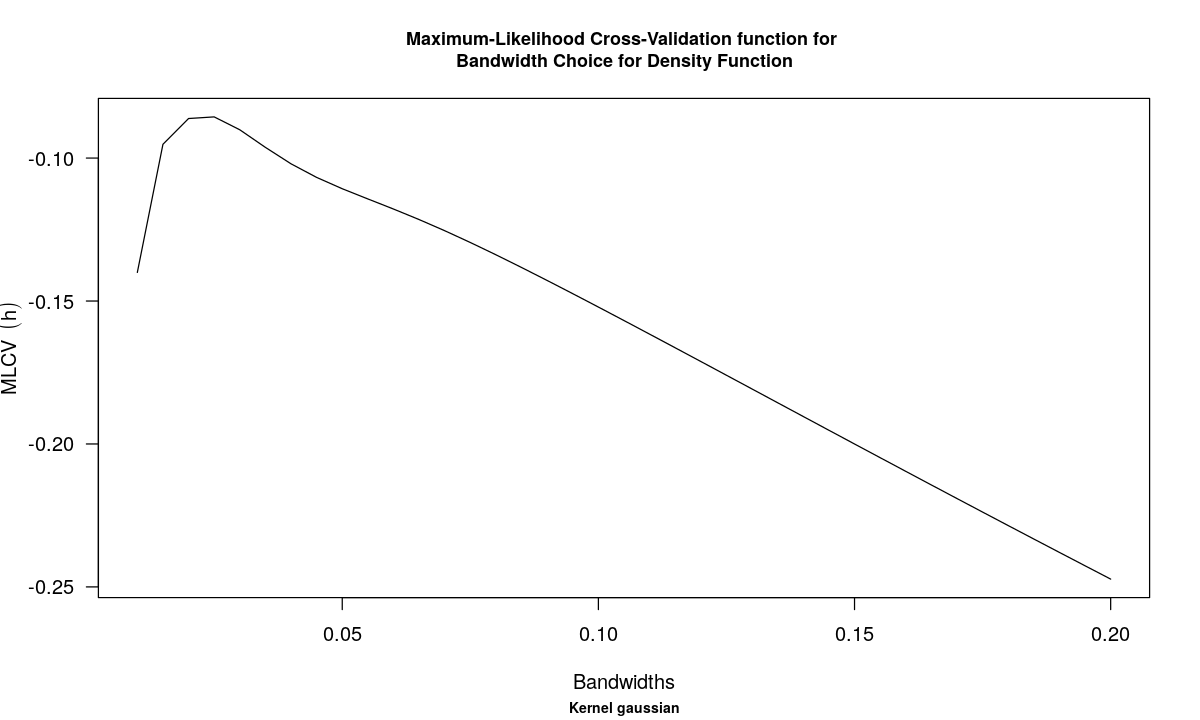

In [9]:
plot(h.mlcv(sample), seq.bws = seq(0.01, 0.2, 0.005))

In [10]:
h.ccv(sample)


Call:		Complete Cross-Validation

Derivative order = 0
Data: sample (100 obs.);	Kernel: gaussian
Min CCV = 0.04574897;	Bandwidth 'h' = 0.1247397


$kernel
[1] "gaussian"

$deriv.order
[1] 0

$seq.bws
 [1] 0.010 0.015 0.020 0.025 0.030 0.035 0.040 0.045 0.050 0.055 0.060 0.065
[13] 0.070 0.075 0.080 0.085 0.090 0.095 0.100 0.105 0.110 0.115 0.120 0.125
[25] 0.130 0.135 0.140 0.145 0.150 0.155 0.160 0.165 0.170 0.175 0.180 0.185
[37] 0.190 0.195 0.200 0.205 0.210 0.215 0.220 0.225 0.230 0.235 0.240 0.245
[49] 0.250 0.255 0.260 0.265 0.270 0.275 0.280 0.285 0.290 0.295 0.300 0.305
[61] 0.310 0.315 0.320 0.325 0.330 0.335 0.340 0.345 0.350 0.355 0.360 0.365
[73] 0.370 0.375 0.380 0.385 0.390 0.395 0.400

$ccv
 [1] 0.28796367 0.22693654 0.16550145 0.13170155 0.11881648 0.11054505
 [7] 0.10056099 0.08867719 0.07673227 0.06655430 0.05904893 0.05414717
[13] 0.05122824 0.04956812 0.04859340 0.04794482 0.04743899 0.04700355
[19] 0.04662282 0.04630288 0.04605327 0.04587921 0.04577979 0.04574891
[25] 0.04577708 0.04585334 0.04596670 0.04610722 0.04626654 0.04643815
[31] 0.04661729 0.04680088 0.04698717 0.04717552 0.04736610 0.04755965
[37] 0.04775728 0.04796029 0.04817009 0.04838805 0.04861552 0.04885376
[43] 0.04910398 0.04936734 0.04964495 0.04993795 0.05024752 0.05057489
[49] 0.05092138 0.05128841 0.05167748 0.05209019 0.05252821 0.05299326
[55] 0.05348707 0.05401139 0.05456789 0.05515817 0.05578375 0.05644597
[61] 0.05714602 0.05788491 0.05866342 0.05948213 0.06034138 0.06124127
[67] 0.06218167 0.06316223 0.06418236 0.06524126 0.06633793 0.06747118
[73] 0.06863965 0.06984183 0.07107606 0.07234058 0.07363351 0.07495290
[79] 0.07629671

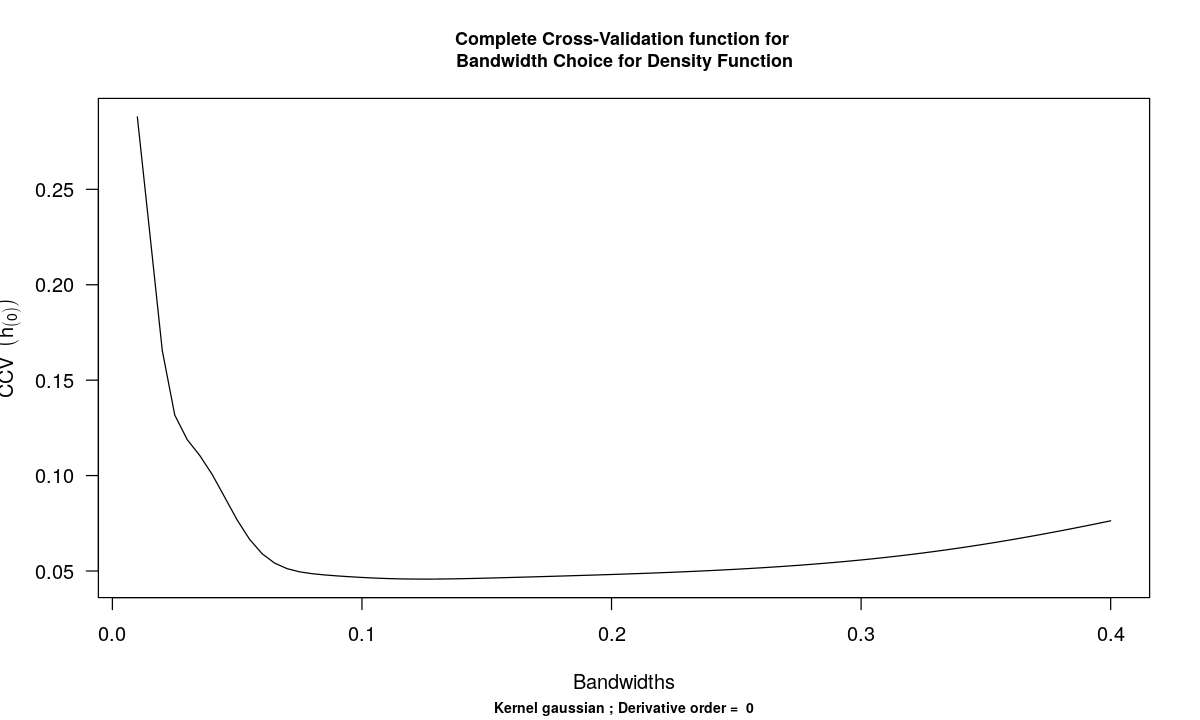

In [11]:
plot(h.ccv(sample), seq.bws = seq(0.01, 0.4, 0.005))

## Ядерная регрессия

Полная документация с примерами https://cran.r-project.org/web/packages/np/vignettes/np.pdf

Возьмем датасет о зависимости заработной платы (логарифм) от возраста по данным переписи населения в Канаде 1971 года. Датасет содержит информацию о 205 мужчинах, имеющих одинаковое образование (grade 13).

In [12]:
data("cps71")
cps71[1:5,]

logwage,age
<dbl>,<dbl>
11.1563,21
12.8131,22
13.0960,22
11.6952,22
11.5327,22


Линейная модель (параметрическая)

In [13]:
model.par <- lm(logwage ~ age + I(age^2), data = cps71)
summary(model.par)


Call:
lm(formula = logwage ~ age + I(age^2), data = cps71)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4041 -0.1711  0.0884  0.3182  1.3940 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.0419773  0.4559986  22.022  < 2e-16 ***
age          0.1731310  0.0238317   7.265 7.96e-12 ***
I(age^2)    -0.0019771  0.0002898  -6.822 1.02e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5608 on 202 degrees of freedom
Multiple R-squared:  0.2308,	Adjusted R-squared:  0.2232 
F-statistic:  30.3 on 2 and 202 DF,  p-value: 3.103e-12


Нелинейная

In [14]:
?npreg

In [15]:
model.np <- npreg(logwage ~ age, data = cps71, regtype = "ll",
                  bwmethod = "cv.aic", gradients = TRUE)
summary(model.np)

                   
Regression Data: 205 training points, in 1 variable(s)
                   age
Bandwidth(s): 2.805308

Kernel Regression Estimator: Local-Linear
Bandwidth Type: Fixed
Residual standard error: 0.5215268
R-squared: 0.3251639

Continuous Kernel Type: Second-Order Gaussian
No. Continuous Explanatory Vars.: 1



In [16]:
npsigtest.res <- npsigtest(model.np)

Bootstrap replication 1/399 for variable 1 of (1)...Bootstrap replication 2/399 for variable 1 of (1)...Bootstrap replication 3/399 for variable 1 of (1)...Bootstrap replication 4/399 for variable 1 of (1)...Bootstrap replication 5/399 for variable 1 of (1)...Bootstrap replication 6/399 for variable 1 of (1)...Bootstrap replication 7/399 for variable 1 of (1)...Bootstrap replication 8/399 for variable 1 of (1)...Bootstrap replication 9/399 for variable 1 of (1)...Bootstrap replication 10/399 for variable 1 of (1)..Bootstrap replication 11/399 for variable 1 of (1)..Bootstrap replication 12/399 for variable 1 of (1)..Bootstrap replication 13/399 for variable 1 of (1)..Bootstrap replication 14/399 for variable 1 of (1)..Bootstrap replication 15/399 for variable 1 of (1)..Bootstrap replication 16/399 for variable 1 of (1)..Bootstrap replication 17/399 for variable 1 of (1)..Bootstrap replication 18/399 for variable 1 of (1)..Bootstrap replication 19/399 for variable 1 of (1)..Bootstrap re

Bootstrap replication 157/399 for variable 1 of (1)...Bootstrap replication 158/399 for variable 1 of (1)...Bootstrap replication 159/399 for variable 1 of (1)...Bootstrap replication 160/399 for variable 1 of (1)...Bootstrap replication 161/399 for variable 1 of (1)...Bootstrap replication 162/399 for variable 1 of (1)...Bootstrap replication 163/399 for variable 1 of (1)...Bootstrap replication 164/399 for variable 1 of (1)...Bootstrap replication 165/399 for variable 1 of (1)...Bootstrap replication 166/399 for variable 1 of (1)...Bootstrap replication 167/399 for variable 1 of (1)...Bootstrap replication 168/399 for variable 1 of (1)...Bootstrap replication 169/399 for variable 1 of (1)...Bootstrap replication 170/399 for variable 1 of (1)...Bootstrap replication 171/399 for variable 1 of (1)...Bootstrap replication 172/399 for variable 1 of (1)...Bootstrap replication 173/399 for variable 1 of (1)...Bootstrap replication 174/399 for variable 1 of (1)...Bootstrap replication 175/3

Bootstrap replication 309/399 for variable 1 of (1)...Bootstrap replication 310/399 for variable 1 of (1)...Bootstrap replication 311/399 for variable 1 of (1)...Bootstrap replication 312/399 for variable 1 of (1)...Bootstrap replication 313/399 for variable 1 of (1)...Bootstrap replication 314/399 for variable 1 of (1)...Bootstrap replication 315/399 for variable 1 of (1)...Bootstrap replication 316/399 for variable 1 of (1)...Bootstrap replication 317/399 for variable 1 of (1)...Bootstrap replication 318/399 for variable 1 of (1)...Bootstrap replication 319/399 for variable 1 of (1)...Bootstrap replication 320/399 for variable 1 of (1)...Bootstrap replication 321/399 for variable 1 of (1)...Bootstrap replication 322/399 for variable 1 of (1)...Bootstrap replication 323/399 for variable 1 of (1)...Bootstrap replication 324/399 for variable 1 of (1)...Bootstrap replication 325/399 for variable 1 of (1)...Bootstrap replication 326/399 for variable 1 of (1)...Bootstrap replication 327/3

In [17]:
npsigtest.res


Kernel Regression Significance Test
Type I Test with IID Bootstrap (399 replications, Pivot = TRUE, joint = FALSE)
Explanatory variables tested for significance:
age (1)

                   age
Bandwidth(s): 2.805308

Individual Significance Tests
P Value: 
age < 2.22e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Графики регрессий и их градиента вместе с доверительным интервалом

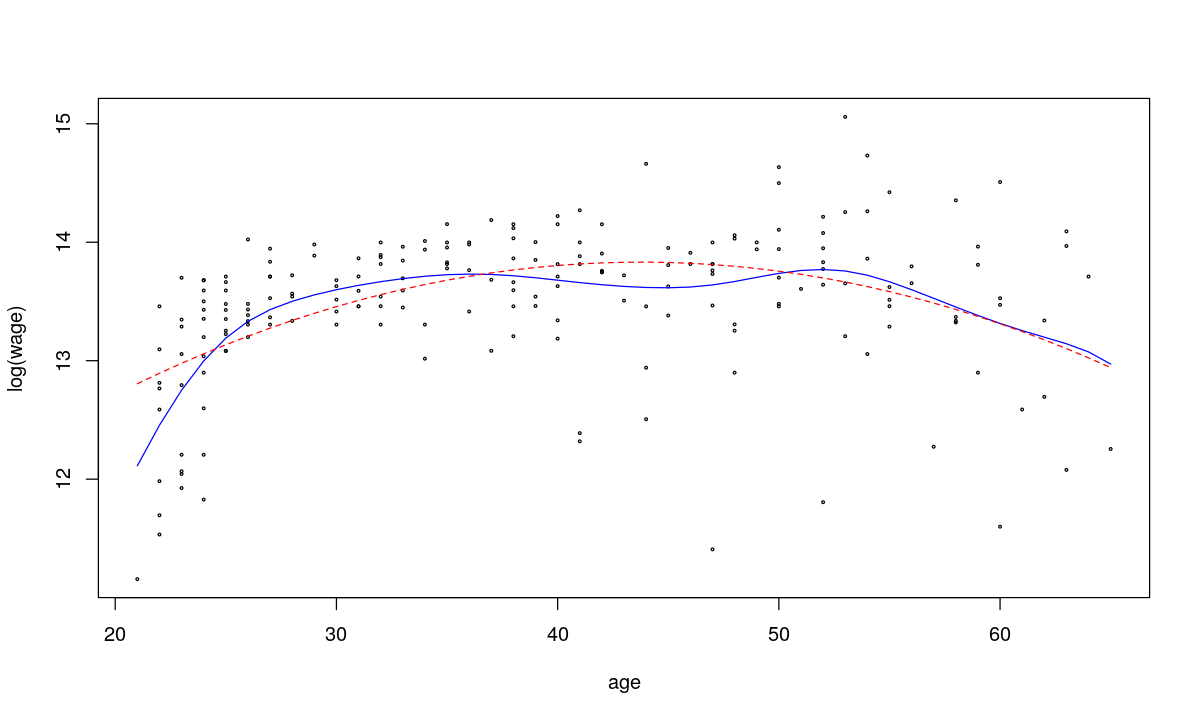

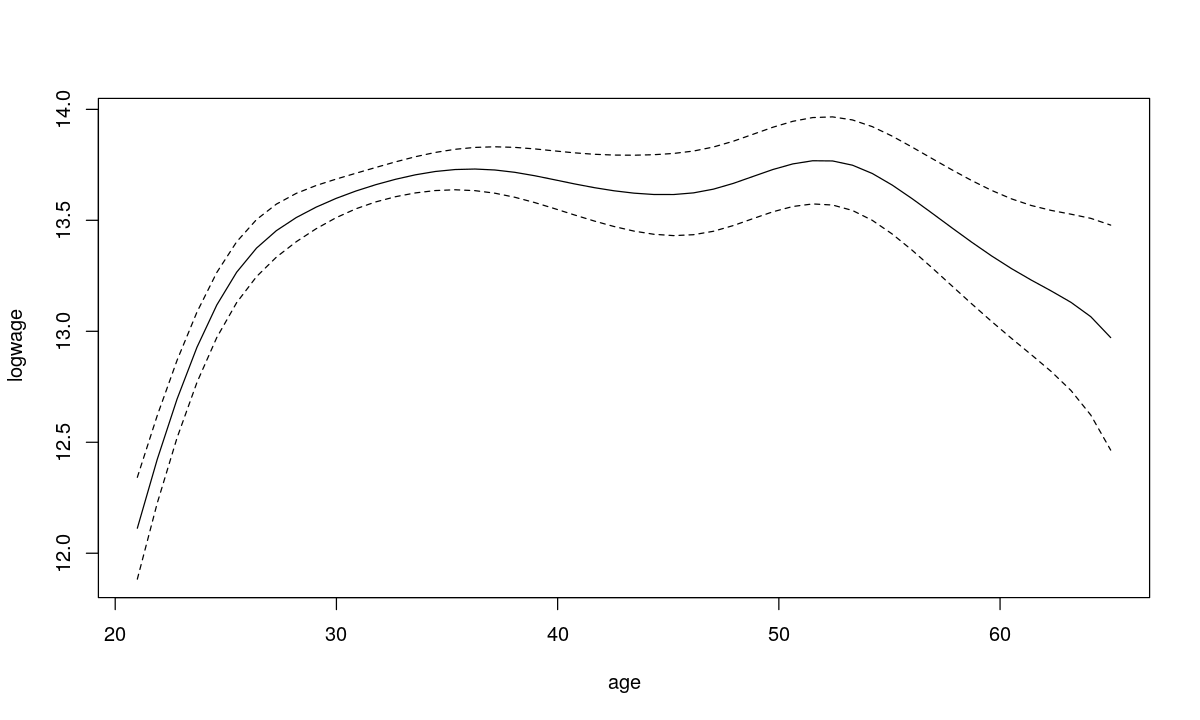

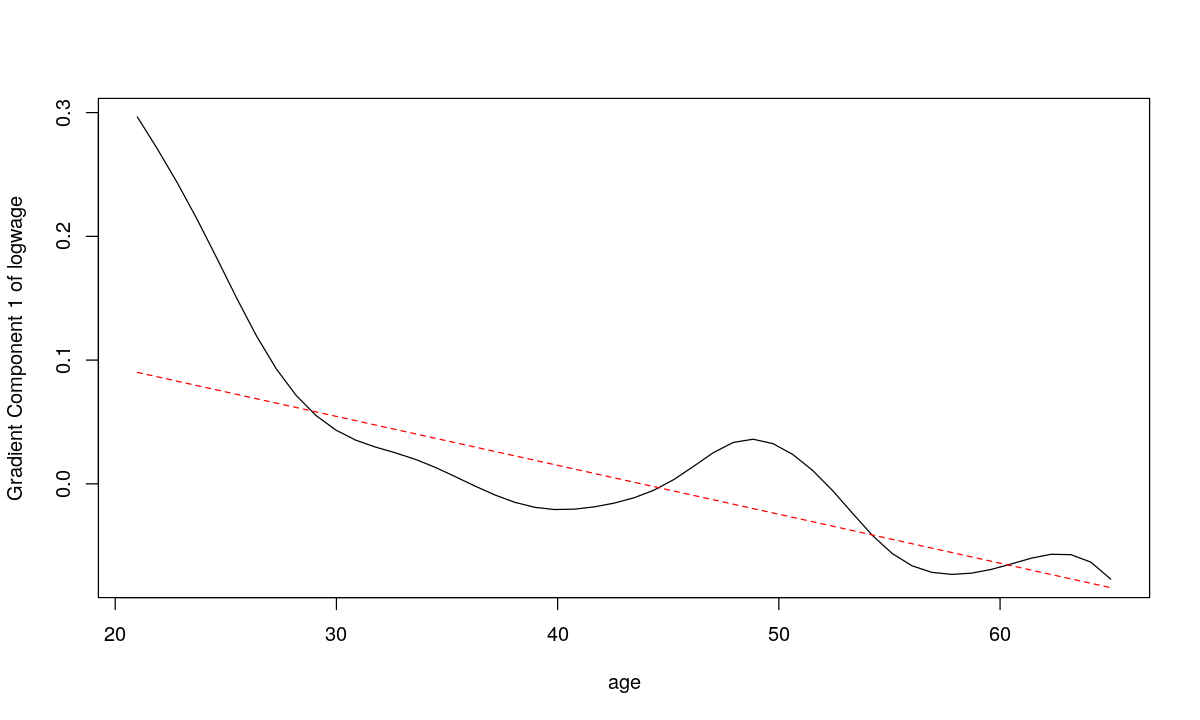

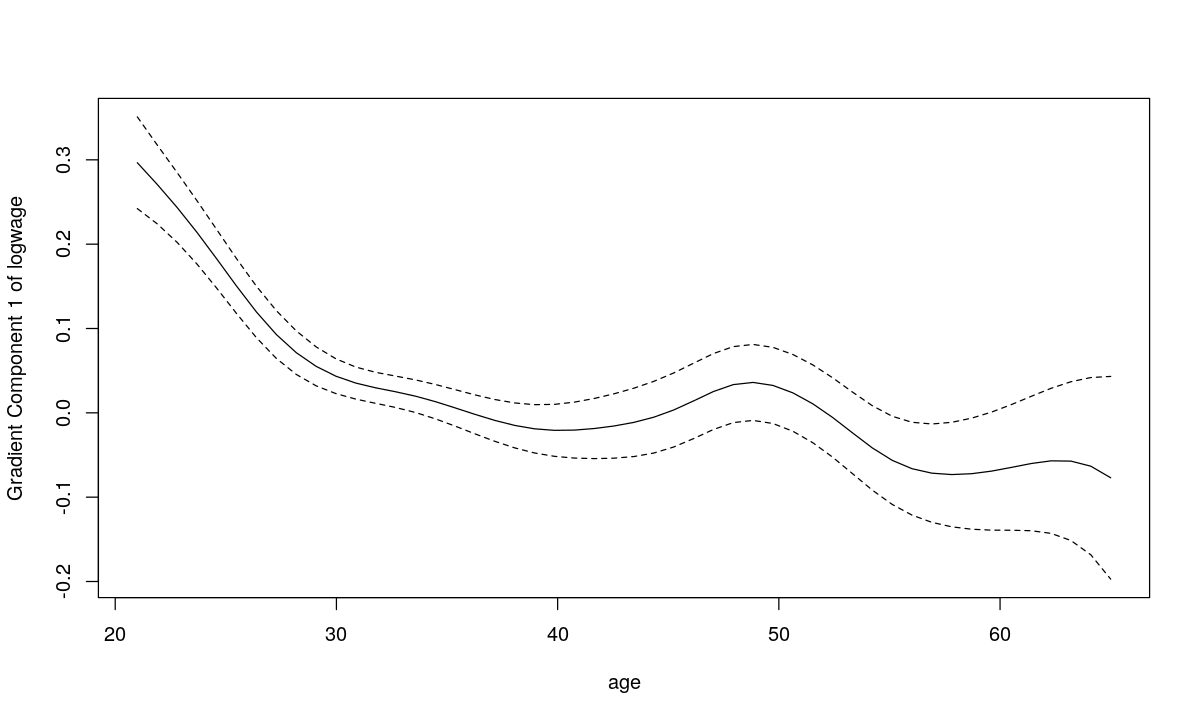

In [18]:
plot(cps71$age, cps71$logwage, xlab = "age", ylab = "log(wage)", cex=0.3)
lines(cps71$age, fitted(model.np), lty = 1, col = "blue")
lines(cps71$age, fitted(model.par), lty = 2, col = " red")

plot(model.np, plot.errors.method = "asymptotic")

plot(model.np, gradients = TRUE)
lines(cps71$age, coef(model.par)[2]+2*cps71$age*coef(model.par)[3], 
      lty = 2, col = "red")

plot(model.np, gradients = TRUE, plot.errors.method = "asymptotic")